In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

In [3]:
data=pd.read_csv('messidor.csv',sep=",",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [4]:
data=np.array(data)
list(range(data.shape[0]))
data.shape[0] 
new=np.array(list(range(data.shape[0])))

In [5]:
for i in list(range(data.shape[0])):
    if data[i,18]==0:
        if data[i,19]==0:
            new[i]=2
        else:
            new[i]=3
    elif data[i,18]==1:
        if data[i,19]==0:
            new[i]=4
        else:
            new[i]=5

In [6]:
newdata=np.column_stack([data[:,:18],new]) #iki vektörü yanyana birleştiriyor.

In [7]:
X=newdata[:,:18]
y=newdata[:,18]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)
clf=SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

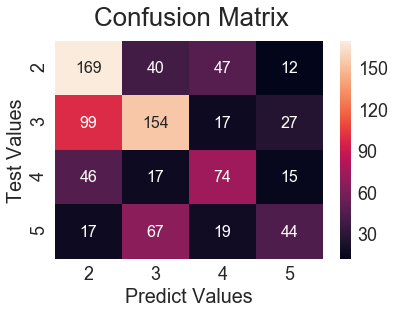

             precision    recall  f1-score   support

    Class 2       0.51      0.63      0.56       268
    Class 3       0.55      0.52      0.54       297
    Class 4       0.47      0.49      0.48       152
    Class 5       0.45      0.30      0.36       147

avg / total       0.51      0.51      0.50       864



In [11]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm,  range(2,6),range(2,6))
sn.set(font_scale=1.8)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d")# font size,  fmt sayıları integer olarak yazdı.
plt.suptitle('Confusion Matrix', x=0.44, y=1.0, ha='center', fontsize='large')
plt.xlabel('Predict Values')
plt.ylabel('Test Values')
plt.show()
targetnames=["Class 2", "Class 3","Class 4", "Class 5"]
print(classification_report(y_test,y_pred,target_names=targetnames))  